In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
csv_path = '/Users/andrewfearney27/cleaned_battle_deaths.csv'
df = pd.read_csv(csv_path)


In [13]:
print (df.head)

<bound method NDFrame.head of       conflict_id  dyad_id           location_inc  \
0             205      406                   Iran   
1             205      406                   Iran   
2             205      406                   Iran   
3             205      406                   Iran   
4             205      406                   Iran   
...           ...      ...                    ...   
1915          289    17247               Colombia   
1916          399    17511  Russia (Soviet Union)   
1917          399    17528  Russia (Soviet Union)   
1918          404    17628               Pakistan   
1919        16038    17666                   Mali   

                                   side_a side_a_id side_a_2nd    side_b  \
0                      Government of Iran       114    Unknown      KDPI   
1                      Government of Iran       114    Unknown      KDPI   
2                      Government of Iran       114    Unknown      KDPI   
3                      Govern

In [12]:
print(df.columns)


Index(['conflict_id', 'dyad_id', 'location_inc', 'side_a', 'side_a_id',
       'side_a_2nd', 'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'bd_best', 'bd_low', 'bd_high',
       'type_of_conflict', 'battle_location', 'gwno_a', 'gwno_a_2nd', 'gwno_b',
       'gwno_b_2nd', 'gwno_loc', 'gwno_battle', 'region', 'version'],
      dtype='object')


In [14]:
print(df.shape)

(1920, 25)


In [15]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


territory_name    1032
gwno_a_2nd        1547
gwno_b            1874
gwno_b_2nd        1835
dtype: int64


In [17]:
df.dropna(inplace=True)  #Drop rows with missing values


In [18]:
df.duplicated().sum()


0

In [40]:
#Print the unique values in 'type_of_conflict'
print(df['type_of_conflict'].unique())

#Print the first few rows of the dataframe to verify
print(df.head())


[]
Empty DataFrame
Columns: [conflict_id, dyad_id, location_inc, side_a, side_a_id, side_a_2nd, side_b, side_b_id, side_b_2nd, incompatibility, territory_name, year, bd_best, bd_low, bd_high, type_of_conflict, battle_location, gwno_a, gwno_a_2nd, gwno_b, gwno_b_2nd, gwno_loc, gwno_battle, region, version]
Index: []

[0 rows x 25 columns]


In [41]:
#Re-load the DataFrame
csv_path = '/Users/andrewfearney27/cleaned_battle_deaths.csv'
df = pd.read_csv(csv_path)

#Print the first few rows to verify the data has been loaded correctly
print(df.head())

#Print the column names to verify they are correct
print(df.columns)

#Check the unique values in 'type_of_conflict' to verify the column data
print(df['type_of_conflict'].unique())


   conflict_id  dyad_id location_inc              side_a side_a_id side_a_2nd  \
0          205      406         Iran  Government of Iran       114    Unknown   
1          205      406         Iran  Government of Iran       114    Unknown   
2          205      406         Iran  Government of Iran       114    Unknown   
3          205      406         Iran  Government of Iran       114    Unknown   
4          205      406         Iran  Government of Iran       114    Unknown   

  side_b side_b_id side_b_2nd  incompatibility  ... type_of_conflict  \
0   KDPI       164    Unknown                1  ...                3   
1   KDPI       164    Unknown                1  ...                3   
2   KDPI       164    Unknown                1  ...                3   
3   KDPI       164    Unknown                1  ...                3   
4   KDPI       164    Unknown                1  ...                3   

   battle_location  gwno_a  gwno_a_2nd  gwno_b  gwno_b_2nd gwno_loc  \
0        

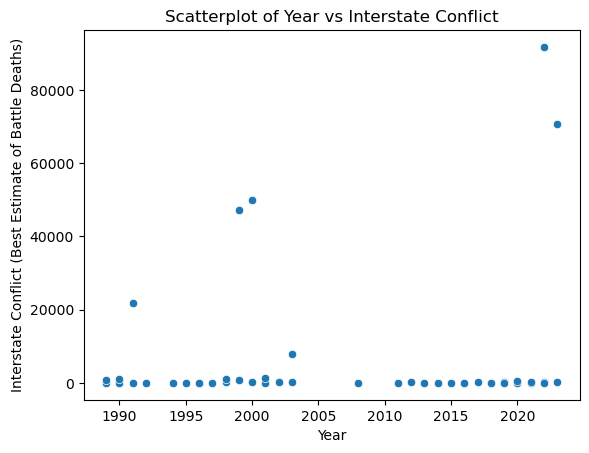

In [42]:
#Q5 Hypothesis 1: year and conflict type

#Filter data for conflict type 2 (interstate)
conflict_type_2 = df[df['type_of_conflict'] == 2]

#Check if there's any data after filtering
if not conflict_type_2.empty:
    # Scatterplot
    sns.scatterplot(x='year', y='bd_best', data=conflict_type_2)
    plt.title('Scatterplot of Year vs Interstate Conflict')
    plt.xlabel('Year')
    plt.ylabel('Interstate Conflict (Best Estimate of Battle Deaths)')
    plt.show()
else:
    print("No data available for conflict type 2.")


In [43]:
#Q6 Reshape the variables into NumPy arrays
X = conflict_type_2[['year']].values
y = conflict_type_2['bd_best'].values


In [44]:
#Q7 Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
#Q8 Run linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

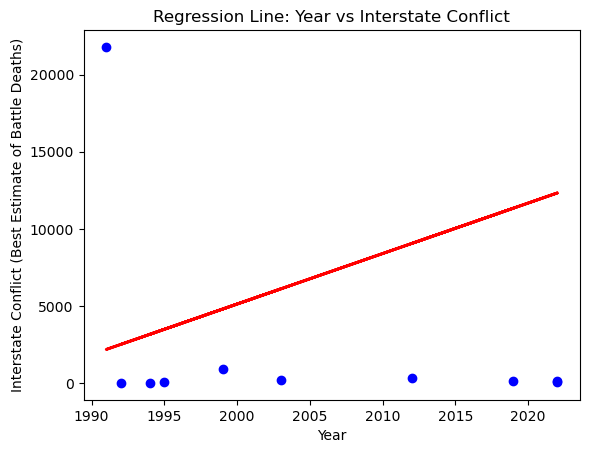

In [47]:
#Q9 Predict the test set results
y_pred = regressor.predict(X_test)

#Create a plot that shows the regression line on the test set
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line: Year vs Interstate Conflict')
plt.xlabel('Year')
plt.ylabel('Interstate Conflict (Best Estimate of Battle Deaths)')
plt.show()



In [54]:
#Check the model performance statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 96121847.42344114
R-squared: -1.2935092387826428


In [56]:
#Q10 Reflection on Model Performance

#The linear regression model did not perform well on the test data. The \(R^2\) value is -1.2935, which indicates that the model does not fit the data well. Additionally, the Mean Squared Error (MSE) is quite high at 96,121,847.4234, suggesting that the predictions are far from the actual values.

#There are several possible reasons for this poor performance:

#1. Outliers: There might be outliers in the data that are affecting the model. These should be investigated and possibly removed.
#2. Non-Linearity: The relationship between the year and the best estimate of battle deaths might not be linear. Exploring non-linear models might provide better results.
#3. Data Variability: The variability in the battle deaths across years could be too high for a linear model to capture effectively.
#4. Insufficient Data: The number of data points might be too small to train an effective model.

#Future steps could include exploring different types of regression models, such as polynomial regression, or using more sophisticated machine learning algorithms to capture the relationship more accurately.```


In [57]:
### Data Bias

#The data might be biased due to various factors such as reporting discrepancies, political influences, or differences in data collection methods across regions and time periods. 
#These biases can affect the accuracy and reliability of the model's predictions.